# Crime Rate Analysis

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set()

In [48]:
df = pd.read_csv('crime reports.csv')

In [49]:
df.head()

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
0,2009-01323,2/21/2009 9:53,02/21/2009 09:20 - 09:30,Threats,105.0,East Cambridge,"100 OTIS ST, Cambridge, MA"
1,2009-01324,2/21/2009 9:59,02/20/2009 22:30 - 02/21/2009 10:00,Auto Theft,1109.0,North Cambridge,"400 RINDGE AVE, Cambridge, MA"
2,2009-01327,2/21/2009 12:32,02/19/2009 21:00 - 02/21/2009 12:00,Hit and Run,1109.0,North Cambridge,"400 RINDGE AVE, Cambridge, MA"
3,2009-01331,2/21/2009 15:05,02/21/2009 15:00 - 15:10,Larceny (Misc),1303.0,Strawberry Hill,"0 NORUMBEGA ST, Cambridge, MA"
4,2009-01346,2/22/2009 5:02,2/22/2009 5:02,OUI,105.0,East Cambridge,"FIFTH ST & GORE ST, Cambridge, MA"


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95923 entries, 0 to 95922
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   File Number      95923 non-null  object 
 1   Date of Report   95923 non-null  object 
 2   Crime Date Time  95912 non-null  object 
 3   Crime            95923 non-null  object 
 4   Reporting Area   95915 non-null  float64
 5   Neighborhood     95915 non-null  object 
 6   Location         95628 non-null  object 
dtypes: float64(1), object(6)
memory usage: 5.1+ MB


In [51]:
df.describe()

,Reporting Area
count,95915.000000
mean,632.548892
std,336.783879
min,101.000000
25%,406.000000
50%,604.000000
75%,912.000000
max,1304.000000


In [52]:
df.isnull().sum()

File Number          0
Date of Report       0
Crime Date Time     11
Crime                0
Reporting Area       8
Neighborhood         8
Location           295
dtype: int64

In [53]:
df.columns

Index(['File Number', 'Date of Report', 'Crime Date Time', 'Crime',
       'Reporting Area', 'Neighborhood', 'Location'],
      dtype='object')

### Data Cleaning

In [77]:
# Convert date columns to datetime
df['Date of Report'] = pd.to_datetime(df['Date of Report'], errors='coerce')
df['Crime Date Time'] = pd.to_datetime(df['Crime Date Time'], errors='coerce')

In [78]:
# Display the count of missing values per column
missing_values = df.isnull().sum()
missing_values

File Number         0
Date of Report      0
Crime Date Time     0
Crime               0
Reporting Area      0
Neighborhood        0
Location           82
Year                0
Month               0
dtype: int64

In [79]:
# Fill missing 'Reporting Area' and 'Neighborhood' with mode
df['Reporting Area'].fillna(df['Reporting Area'].mode()[0], inplace=True)
df['Neighborhood'].fillna(df['Neighborhood'].mode()[0], inplace=True)

missing_values

C:\Users\HP\AppData\Local\Temp\ipykernel_8636\572147882.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Reporting Area'].fillna(df['Reporting Area'].mode()[0], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8636\572147882.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

File Number         0
Date of Report      0
Crime Date Time     0
Crime               0
Reporting Area      0
Neighborhood        0
Location           82
Year                0
Month               0
dtype: int64

In [80]:
# Drop rows with missing 'Crime Date Time' as it is crucial for time-based analysis
df.dropna(subset=['Crime Date Time'], inplace=True)

In [81]:
# Display cleaned data information
cleaned_info = df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38074 entries, 4 to 95916
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   File Number      38074 non-null  object        
 1   Date of Report   38074 non-null  datetime64[ns]
 2   Crime Date Time  38074 non-null  datetime64[ns]
 3   Crime            38074 non-null  object        
 4   Reporting Area   38074 non-null  float64       
 5   Neighborhood     38074 non-null  object        
 6   Location         37992 non-null  object        
 7   Year             38074 non-null  int32         
 8   Month            38074 non-null  period[M]     
dtypes: datetime64[ns](2), float64(1), int32(1), object(4), period[M](1)
memory usage: 2.8+ MB


In [82]:
df.head()

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,Year,Month
4,2009-01346,2009-02-22 05:02:00,2009-02-22 05:02:00,OUI,105.0,East Cambridge,"FIFTH ST & GORE ST, Cambridge, MA",2009,2009-02
8,2009-01385,2009-02-23 20:16:00,2009-02-23 20:16:00,Housebreak,1108.0,North Cambridge,"100 CLIFTON ST, Cambridge, MA",2009,2009-02
14,2009-01426,2009-02-25 13:51:00,2009-02-25 13:51:00,Warrant Arrest,105.0,East Cambridge,"200 BENT ST, Cambridge, MA",2009,2009-02
15,2009-01429,2009-02-25 13:47:00,2009-02-25 13:47:00,Forgery,1108.0,North Cambridge,"100 HARVEY ST, Cambridge, MA",2009,2009-02
17,2009-01436,2009-02-25 17:52:00,2009-02-20 00:10:00,Simple Assault,106.0,East Cambridge,"0 FULKERSON ST, Cambridge, MA",2009,2009-02


C:\Users\HP\AppData\Local\Temp\ipykernel_8636\1773515306.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_type_counts.index, y=crime_type_counts.values, palette='viridis')


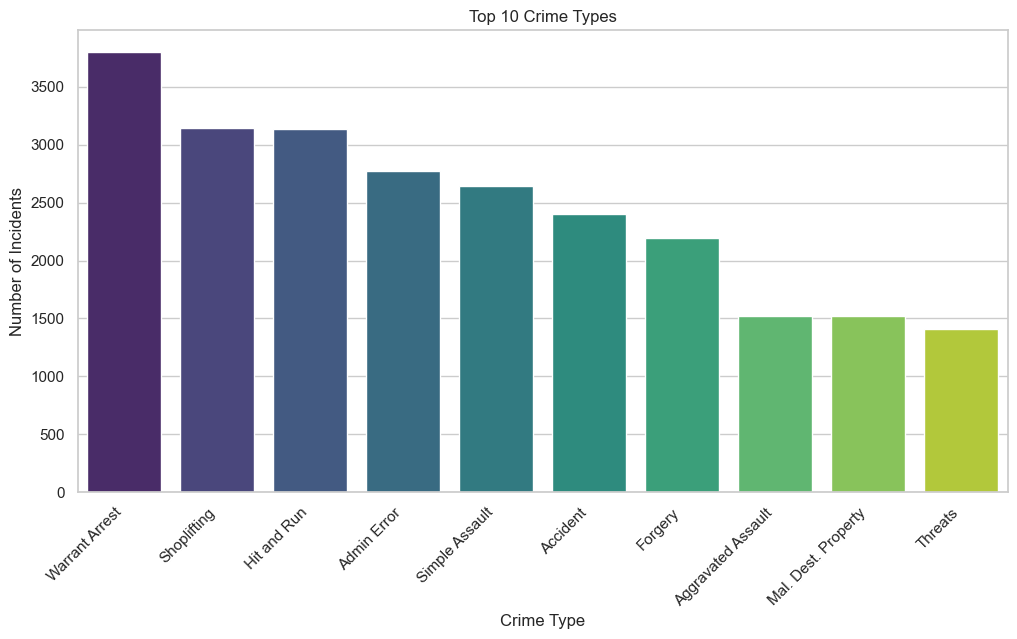

In [83]:
# Set the plot style
sns.set(style="whitegrid")

# Distribution of crime types
plt.figure(figsize=(12, 6))
crime_type_counts = df['Crime'].value_counts().head(10)  # Top 10 crime types
sns.barplot(x=crime_type_counts.index, y=crime_type_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.title('Top 10 Crime Types')
plt.show()

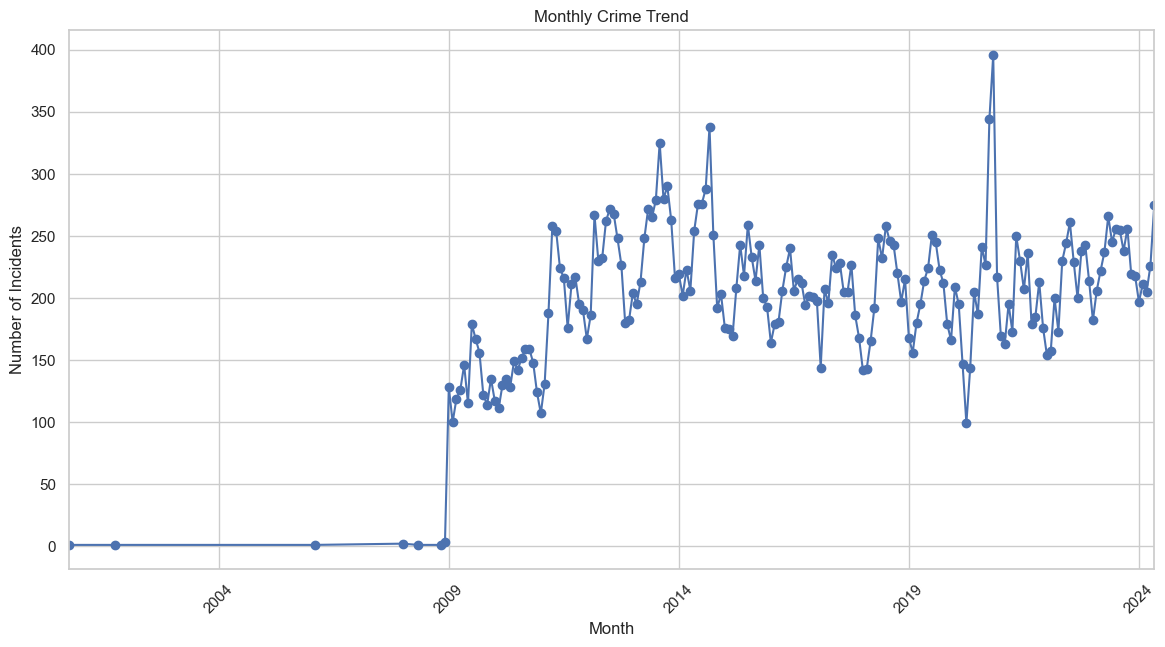

In [84]:
# Extract year and month from the 'Crime Date Time' column
df['Year'] = df['Crime Date Time'].dt.year
df['Month'] = df['Crime Date Time'].dt.to_period('M')

# Aggregate data by year and month
monthly_crime_trend = df.groupby('Month').size()

# Plotting the monthly crime trend
plt.figure(figsize=(14, 7))
monthly_crime_trend.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.title('Monthly Crime Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8636\2908135180.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_crime_counts.values, y=neighborhood_crime_counts.index, palette='viridis')


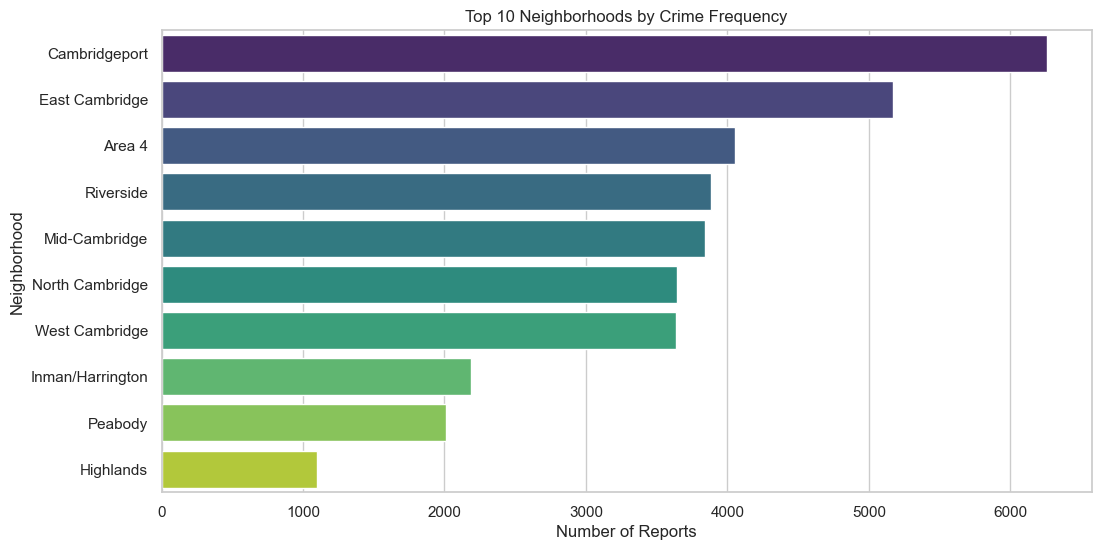

In [85]:
#Crimes by Neighborhood
neighborhood_crime_counts = df['Neighborhood'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=neighborhood_crime_counts.values, y=neighborhood_crime_counts.index, palette='viridis')
plt.title('Top 10 Neighborhoods by Crime Frequency')
plt.xlabel('Number of Reports')
plt.ylabel('Neighborhood')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_8636\1992632838.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_crime_counts.values, y=location_crime_counts.index, palette='viridis')


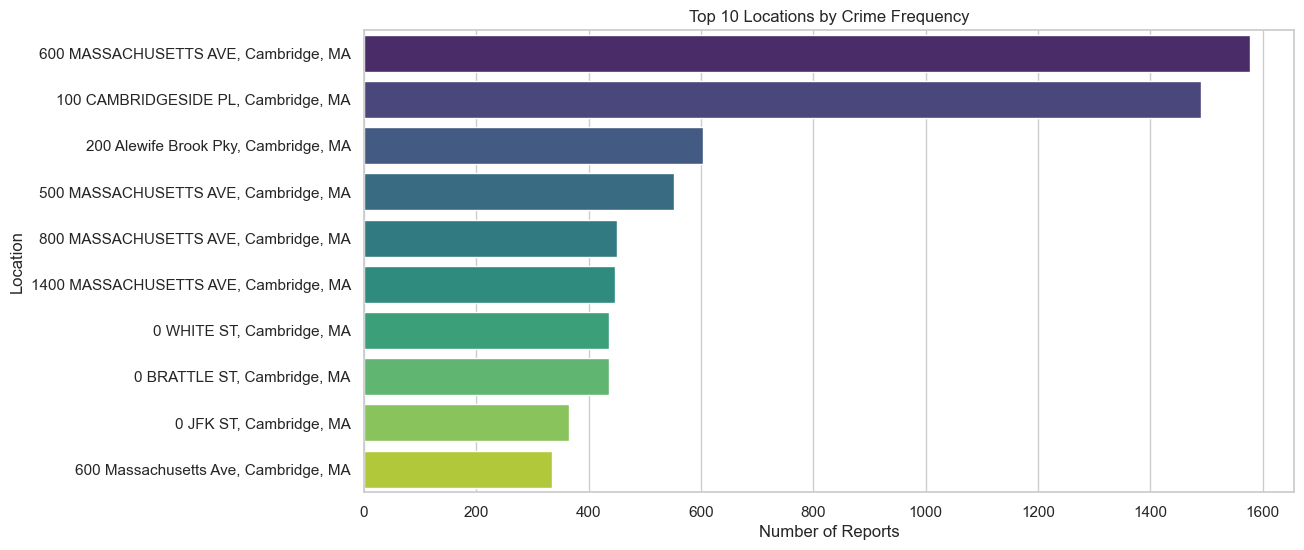

In [86]:
#Crimes by Location
location_crime_counts = df['Location'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=location_crime_counts.values, y=location_crime_counts.index, palette='viridis')
plt.title('Top 10 Locations by Crime Frequency')
plt.xlabel('Number of Reports')
plt.ylabel('Location')
plt.show()


## Crime Prevention Strategies

##### 1- Increase Police Presence: In areas identified as crime hotspots, increasing police patrols can deter criminal activity.
##### 2- Community Policing: Engage with the community to build trust and encourage residents to report suspicious activities.
##### 3- Improve Lighting and Surveillance: Enhance street lighting and install surveillance cameras in high-crime areas to increase visibility and deter crime.
##### 4- Neighborhood Watch Programs: Encourage community members to participate in neighborhood watch programs to monitor and report criminal activities.
##### 5- Youth Engagement Programs: Implement programs to engage youth in positive activities and prevent them from engaging in criminal behavior.
##### 6- Public Awareness Campaigns: Educate the public about crime prevention measures and encourage them to take proactive steps to protect themselves and their property.
##### 7- Address Root Causes: Work on social and economic factors that contribute to crime, such as poverty, unemployment, and lack of education.